# Computational Physics Lab 6

In [32]:
from scipy import integrate
import matplotlib.pylab as plt
import math
import cmath
import numpy as np
% matplotlib inline

## Newman Excercise 5.12

In [33]:
def f(x):
    return math.exp(-x)*x*x*x/(1-math.exp(-x))  # Had to rearange the equation by mutliplying the numerator and denominator by
                                                # e to the -x so that x cubed would not get too larg too quickly.


Plancks = 6.62607004*10**-34 # kg m^2 s^-1
h_bar = Plancks/(2*math.pi) # kg m^2 s^-1
Boltz = 1.38064852*10**-23 # m^2 kg s^-2 K^-1
c = 3.00*10**8 # m/s
N = 100
a = 10**-8
b = np.inf
T = 5778 # Temperature of the sun in Kelvin


constant = ((Boltz**4)*T**4)/(4*(math.pi)**2*c**2*h_bar**3)
integral, error = integrate.quad(f, a, b)
print("Total rate at which energy is radiated from the sun: ", constant*integral)
print("The error of this calculation is: ", error*constant)
print("The Stefan-Boltzmann constant is: ", constant*integral/T**4)

Total rate at which energy is radiated from the :  63113200.02842408
The error of this calculation is:  0.025545544574065705
The Stefan-Boltzmann constant is:  5.662523934769154e-08


## Newman Exercise 5.19

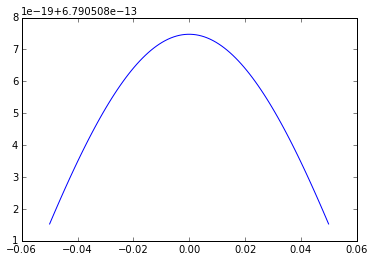

In [78]:
def integrand(u,x):
    
    alpha = math.pi/20e-6 # meters
    part1 = math.sqrt(math.sin(alpha*u)**2)
    part2 = cmath.exp(1j*2*math.pi*x*u/(lamb*f))
    return (part1*part2)
    
alpha = math.pi/(20e-6) # m^-1   
f = 1 # meters
#x = 0.1 # meters
w = 200e-6 # meters
lamb = 500e-9 
I = []
x_axis = []

for x in np.linspace(-0.05,0.05,100):
    a = -w/2
    b = w/2
    N = 100
    h = (b-a)/N  
    s = (integrand(a,x) + integrand(b,x))
    
    for k in range(1,N):
        if k%2 == 0:
            s += 2*(integrand(a+k*h, x))

        elif k%2 == 1:
            s += 4*(integrand(a+k*h, x))

        
        s = (h/3)*s
        
    I.append(abs(s)**2)
    x_axis.append(x)
    
plt.plot(x_axis,I)